# Project 3

In this project, you will perform a logistic regression on the admissions data we've been working with in projects 1 and 2.

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import statsmodels.api as sm
import pylab as pl
import numpy as np


In [4]:
df_raw = pd.read_csv("../assets/admissions.csv")
df = df_raw.dropna() 
print df.head()

   admit    gre   gpa  prestige
0      0  380.0  3.61       3.0
1      1  660.0  3.67       3.0
2      1  800.0  4.00       1.0
3      1  640.0  3.19       4.0
4      0  520.0  2.93       4.0


## Part 1. Frequency Tables

#### 1. Let's create a frequency table of our variables

In [5]:
# frequency table for prestige and whether or not someone was admitted
print pd.crosstab(df['admit'], df['prestige'])

prestige  1.0  2.0  3.0  4.0
admit                       
0          28   95   93   55
1          33   53   28   12


## Part 2. Return of dummy variables

#### 2.1 Create class or dummy variables for prestige 

In [6]:
dummy_prestige = pd.get_dummies(df['prestige'], prefix='prestige')
print dummy_prestige.head()

   prestige_1.0  prestige_2.0  prestige_3.0  prestige_4.0
0             0             0             1             0
1             0             0             1             0
2             1             0             0             0
3             0             0             0             1
4             0             0             0             1


#### 2.2 When modeling our class variables, how many do we need? 



Answer: 

## Part 3. Hand calculating odds ratios

Develop your intuition about expected outcomes by hand calculating odds ratios.

In [7]:
cols_to_keep = ['admit', 'gre', 'gpa']
handCalc = df[cols_to_keep].join(dummy_prestige.ix[:, 'prestige_1':])
print handCalc.head()

   admit    gre   gpa  prestige_1.0  prestige_2.0  prestige_3.0  prestige_4.0
0      0  380.0  3.61             0             0             1             0
1      1  660.0  3.67             0             0             1             0
2      1  800.0  4.00             1             0             0             0
3      1  640.0  3.19             0             0             0             1
4      0  520.0  2.93             0             0             0             1


In [8]:
#crosstab prestige 1 admission 
# frequency table cutting prestige and whether or not someone was admitted
ct = pd.crosstab(handCalc['admit'], handCalc['prestige_1.0'])
print ct

prestige_1.0    0   1
admit                
0             243  28
1              93  33


#### 3.1 Use the cross tab above to calculate the odds of being admitted to grad school if you attended a #1 ranked college

In [12]:
# not sure if calculating the %'s is the same as calculating the odds??
attended = float(ct[1][1]) / ct[1][0]

#### 3.2 Now calculate the odds of admission if you did not attend a #1 ranked college

In [13]:
# not sure if calculating the %'s is the same as calculating the odds??
didnt_attend = float(ct[0][1]) / ct[0][0]

#### 3.3 Calculate the odds ratio

In [15]:
attended / didnt_attend

3.0794930875576041

#### 3.4 Write this finding in a sentenance: 

Answer: The odds of gaining admission to graduate school is 3.1 times higher if you attended a #1 ranked college

#### 3.5 Print the cross tab for prestige_4

In [16]:
ct_4 = pd.crosstab(handCalc['admit'], handCalc['prestige_4.0'])
print ct_4

prestige_4.0    0   1
admit                
0             216  55
1             114  12


#### 3.6 Calculate the OR 

In [17]:
(float(ct_4[0][0]) / float(ct_4[0][1])) / (float(ct_4[1][0]) / float(ct_4[1][1]))

0.4133971291866029

#### 3.7 Write this finding in a sentence

Answer: You are 59% less likely to gain admission into graduate school if you attended a #4 ranked college

## Part 4. Analysis

In [18]:
# create a clean data frame for the regression
cols_to_keep = ['admit', 'gre', 'gpa']
data = df[cols_to_keep].join(dummy_prestige.ix[:, 'prestige_2':])
print data.head()

   admit    gre   gpa  prestige_2.0  prestige_3.0  prestige_4.0
0      0  380.0  3.61             0             1             0
1      1  660.0  3.67             0             1             0
2      1  800.0  4.00             0             0             0
3      1  640.0  3.19             0             0             1
4      0  520.0  2.93             0             0             1


We're going to add a constant term for our Logistic Regression. The statsmodels function we're going to be using requires that intercepts/constants are specified explicitly.

In [19]:
# manually add the intercept
data['intercept'] = 1.0
print data.head()

   admit    gre   gpa  prestige_2.0  prestige_3.0  prestige_4.0  intercept
0      0  380.0  3.61             0             1             0        1.0
1      1  660.0  3.67             0             1             0        1.0
2      1  800.0  4.00             0             0             0        1.0
3      1  640.0  3.19             0             0             1        1.0
4      0  520.0  2.93             0             0             1        1.0


#### 4.1 Set the covariates to a variable called train_cols

In [20]:
train_cols = data.columns[1:]
print train_cols

Index([u'gre', u'gpa', u'prestige_2.0', u'prestige_3.0', u'prestige_4.0',
       u'intercept'],
      dtype='object')


#### 4.2 Fit the model

In [21]:
logit = sm.Logit(data['admit'], data[train_cols])

result = logit.fit()

Optimization terminated successfully.
         Current function value: 0.573854
         Iterations 6


#### 4.3 Print the summary results

In [22]:
print result.summary()

                           Logit Regression Results                           
Dep. Variable:                  admit   No. Observations:                  397
Model:                          Logit   Df Residuals:                      391
Method:                           MLE   Df Model:                            5
Date:                Thu, 13 Apr 2017   Pseudo R-squ.:                 0.08166
Time:                        00:09:46   Log-Likelihood:                -227.82
converged:                       True   LL-Null:                       -248.08
                                        LLR p-value:                 1.176e-07
                   coef    std err          z      P>|z|      [95.0% Conf. Int.]
--------------------------------------------------------------------------------
gre              0.0022      0.001      2.028      0.043      7.44e-05     0.004
gpa              0.7793      0.333      2.344      0.019         0.128     1.431
prestige_2.0    -0.6801      0.317     -2.14

#### 4.4 Calculate the odds ratios of the coeffiencents and their 95% CI intervals

hint 1: np.exp(X)

hint 2: conf['OR'] = params
        
           conf.columns = ['2.5%', '97.5%', 'OR']

In [23]:
print result.conf_int()

                     0         1
gre           0.000074  0.004362
gpa           0.127619  1.431056
prestige_2.0 -1.301337 -0.058936
prestige_3.0 -2.014579 -0.662776
prestige_4.0 -2.371624 -0.735197
intercept    -6.116077 -1.637631


In [24]:
print np.exp(result.params)

gre             1.002221
gpa             2.180027
prestige_2.0    0.506548
prestige_3.0    0.262192
prestige_4.0    0.211525
intercept       0.020716
dtype: float64


#### 4.5 Interpret the OR of Prestige_2

Answer: 49.4% less likely to get admission to graduate school if you attended #2 prestige college than #1 prestige

#### 4.6 Interpret the OR of GPA

Answer: For every 1 unit increase in GPA, your odds of being accepted into graduate school increase by 2.2

## Part 5: Predicted probablities


As a way of evaluating our classifier, we're going to recreate the dataset with every logical combination of input values. This will allow us to see how the predicted probability of admission increases/decreases across different variables. First we're going to generate the combinations using a helper function called cartesian (above).

We're going to use np.linspace to create a range of values for "gre" and "gpa". This creates a range of linearly spaced values from a specified min and maximum value--in our case just the min/max observed values.

In [26]:
def cartesian(arrays, out=None):
    """
    Generate a cartesian product of input arrays.
    Parameters
    ----------
    arrays : list of array-like
        1-D arrays to form the cartesian product of.
    out : ndarray
        Array to place the cartesian product in.
    Returns
    -------
    out : ndarray
        2-D array of shape (M, len(arrays)) containing cartesian products
        formed of input arrays.
    Examples
    --------
    >>> cartesian(([1, 2, 3], [4, 5], [6, 7]))
    array([[1, 4, 6],
           [1, 4, 7],
           [1, 5, 6],
           [1, 5, 7],
           [2, 4, 6],
           [2, 4, 7],
           [2, 5, 6],
           [2, 5, 7],
           [3, 4, 6],
           [3, 4, 7],
           [3, 5, 6],
           [3, 5, 7]])
    """

    arrays = [np.asarray(x) for x in arrays]
    dtype = arrays[0].dtype

    n = np.prod([x.size for x in arrays])
    if out is None:
        out = np.zeros([n, len(arrays)], dtype=dtype)

    m = n / arrays[0].size
    out[:,0] = np.repeat(arrays[0], m)
    if arrays[1:]:
        cartesian(arrays[1:], out=out[0:m,1:])
        for j in xrange(1, arrays[0].size):
            out[j*m:(j+1)*m,1:] = out[0:m,1:]
    return out

In [44]:
# instead of generating all possible values of GRE and GPA, we're going
# to use an evenly spaced range of 10 values from the min to the max 
gres = np.linspace(data['gre'].min(), data['gre'].max(), 10)
print gres
# array([ 220.        ,  284.44444444,  348.88888889,  413.33333333,
#         477.77777778,  542.22222222,  606.66666667,  671.11111111,
#         735.55555556,  800.        ])
gpas = np.linspace(data['gpa'].min(), data['gpa'].max(), 10)
print gpas
# array([ 2.26      ,  2.45333333,  2.64666667,  2.84      ,  3.03333333,
#         3.22666667,  3.42      ,  3.61333333,  3.80666667,  4.        ])


# enumerate all possibilities
combos = pd.DataFrame(cartesian([gres, gpas, [1, 2, 3, 4], [1.]]))

print combos.head()

[ 220.          284.44444444  348.88888889  413.33333333  477.77777778
  542.22222222  606.66666667  671.11111111  735.55555556  800.        ]
[ 2.26        2.45333333  2.64666667  2.84        3.03333333  3.22666667
  3.42        3.61333333  3.80666667  4.        ]
       0         1    2    3
0  220.0  2.260000  1.0  1.0
1  220.0  2.260000  2.0  1.0
2  220.0  2.260000  3.0  1.0
3  220.0  2.260000  4.0  1.0
4  220.0  2.453333  1.0  1.0


#### 5.1 Recreate the dummy variables

In [45]:
# recreate the dummy variables
dummy_combos = pd.get_dummies(combos[2], prefix='prestige')
print dummy_combos.head()

   prestige_1.0  prestige_2.0  prestige_3.0  prestige_4.0
0             1             0             0             0
1             0             1             0             0
2             0             0             1             0
3             0             0             0             1
4             1             0             0             0


In [91]:
# keep only what we need for making predictions

combos.columns = ['gre', 'gpa', 'rank', 'intercept']
combo_cols_to_keep = ['gre', 'gpa', 'intercept']

predict_data = combos[combo_cols_to_keep].join(dummy_combos.ix[:, 'prestige_2':])

predict_data = predict_data[['gre', 'gpa', 'prestige_2.0', 'prestige_3.0', 'prestige_4.0', 'intercept']]

print predict_data.head()

     gre       gpa  prestige_2.0  prestige_3.0  prestige_4.0  intercept
0  220.0  2.260000             0             0             0        1.0
1  220.0  2.260000             1             0             0        1.0
2  220.0  2.260000             0             1             0        1.0
3  220.0  2.260000             0             0             1        1.0
4  220.0  2.453333             0             0             0        1.0


#### 5.2 Make predictions on the enumerated dataset

In [92]:
predict_data['result'] = result.predict(predict_data)

In [97]:
combos['result'] = predict_data['result']

In [98]:
predict_data.tail(4)

,gre,gpa,prestige_2.0,prestige_3.0,prestige_4.0,intercept,result
396,800.0,4.0,0,0,0,1.0,0.734040
397,800.0,4.0,1,0,0,1.0,0.582995
398,800.0,4.0,0,1,0,1.0,0.419833
399,800.0,4.0,0,0,1,1.0,0.368608


#### 5.3 Interpret findings for the last 4 observations

Answer: The prestige of the school significantly affects the chances of being accepted into graduate school regardless of gre and gpa. As the prestige of the school decreases, the chances of being accepted also decrease.

## Bonus

Plot the probability of being admitted into graduate school, stratified by GPA and GRE score.

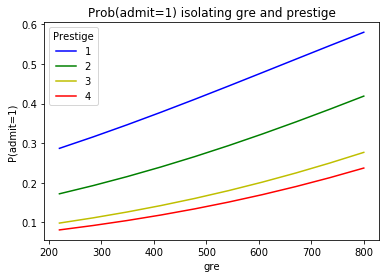

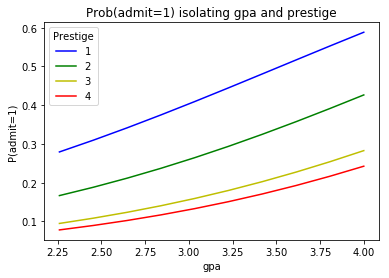

In [109]:
def isolate_and_plot(variable):
    grouped = pd.pivot_table(combos, values=['result'], index=[variable, 'rank'], aggfunc=np.mean)
    colors = 'rbgyrbgy'
    for col in combos['rank'].unique():
        plt_data = grouped.ix[grouped.index.get_level_values(1)==col]
        pl.plot(plt_data.index.get_level_values(0), plt_data['result'], color=colors[int(col)])
    pl.xlabel(variable)
    pl.ylabel("P(admit=1)")
    pl.legend(['1', '2', '3', '4'], loc='upper left', title='Prestige')
    pl.title("Prob(admit=1) isolating " + variable + " and prestige")
    pl.show()

isolate_and_plot('gre')
isolate_and_plot('gpa')